## Python Dataframes
A dataframe is a two-dimentional data structure, i.e. data is a tabular fashion in rows and columns. Dataframes consistis of three principal components, the data, rows, and columns.

##### Pandas Dataframes
Pandas is one of the most used open-source Python libraries to work with Structured tabular data for analysis. Pandas library is heavlly ised for Data Analytics, Machine learning, data science projects, and many more.
Useful Pandas online resources: https://sparkbyexamples.com/python-pandas-tutorial-for-beginners/ or https://pandas.pydata.org/docs/

##### Spark Dataframes
PySpark is a Spark library written in Python to run Python applications using Apache Spark capabilities. Using PySpark we can run applications parallelly on the distributed cluster(multi nodes) or even on a single node.
Useful PySpark online resources: https://sparkbyexamples.com/pyspark-tutorial/ or https://spark.apache.org/docs/latest/api/python/index.html

##### PySpark Advantages
- PySpark is a general-purpose, in-memory, distributed processing engine that allows you to process data efficiently in a distributed fashion.
- Applications running on PySpark are 100x faster thatn tranditional systems.
- Using PySpark we can process data from Hadoop HDFS, AWS S3, and many files systems.
- PySpark natively has machine learning and graph libraries.

##### PySpark Advantages
Using Pandas API on PySpark enables data scientists and data engineers who have prior knowledge of pandas more productive by running the pandas DataFrame API on PySpark by utilizing its capabilities and running pandas operations 10x faster for big data sets. Useful PySpark.Pandas online resource: https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/index.html


https://www.youtube.com/watch?v=XEi-0lGYj0o&t=144s


## Creating a Pandas Dataframe
Does have the ability to import and export from workbench (AWS S3),but it requires additional packages and other requirements

In [0]:
# Import Pandas Package
import pandas as pd

# Import Spark Pandas Package
import pyspark.pandas as ps

import numpy as np

from pyspark.sql.functions import count, col, when, sum
from pyspark.sql.types import BooleanType, IntegerType
from pyspark.sql import functions as F

In [0]:
# Create Dictionary with lists for data
data = { 'First_Name' : ['Jordan', 'Aaron','Elgton', 'Christian', ' Kenny', 'Rashan', 'Quay', 'Jaire'],
        'Last_Name':['Love', 'Jones', 'Jenkins', 'Watson', 'Clark', 'Gary', 'Walker', 'Alexander'],
        'Position':['QB', 'RB', 'OL', 'WR', 'DL', 'OLB', 'ILB', ' CB'],
        'College':['Nevada', 'UTEP', 'Mississipi St', 'North Dakota St', 'UCLA', 'Michigan', 'Georgia', 'Loisville']}

# Print Dictionary
print(data)

{'First_Name': ['Jordan', 'Aaron', 'Elgton', 'Christian', ' Kenny', 'Rashan', 'Quay', 'Jaire'], 'Last_Name': ['Love', 'Jones', 'Jenkins', 'Watson', 'Clark', 'Gary', 'Walker', 'Alexander'], 'Position': ['QB', 'RB', 'OL', 'WR', 'DL', 'OLB', 'ILB', ' CB'], 'College': ['Nevada', 'UTEP', 'Mississipi St', 'North Dakota St', 'UCLA', 'Michigan', 'Georgia', 'Loisville']}


In [0]:
# Convert Dictionary to Pandas Dataframe
pd_df = pd.DataFrame(data)

# Print Pandas Dataframe
print(pd_df)

  First_Name  Last_Name Position          College
0     Jordan       Love       QB           Nevada
1      Aaron      Jones       RB             UTEP
2     Elgton    Jenkins       OL    Mississipi St
3  Christian     Watson       WR  North Dakota St
4      Kenny      Clark       DL             UCLA
5     Rashan       Gary      OLB         Michigan
6       Quay     Walker      ILB          Georgia
7      Jaire  Alexander       CB        Loisville


In [0]:
# Display Pandas Dataframe
pd_df.display()

First_Name,Last_Name,Position,College
Jordan,Love,QB,Nevada
Aaron,Jones,RB,UTEP
Elgton,Jenkins,OL,Mississipi St
Christian,Watson,WR,North Dakota St
Kenny,Clark,DL,UCLA
Rashan,Gary,OLB,Michigan
Quay,Walker,ILB,Georgia
Jaire,Alexander,CB,Loisville


## Creating a Spark Dataframe
Allows us the ability to query direcly from Hive or import and export from workbench (AWS S3)

In [0]:
%sql
show tables

database,tableName,isTemporary
default,test,false


In [0]:
# Pull Data from Hive Table into Spark Dataframe
sp_df = spark.sql("SELECT * FROM default.test")

# Print Top 5 Records of Spark Dataframe
sp_df.show(n=5)

+---+---+
|  A|  B|
+---+---+
|  1|  a|
|  2|  b|
|  3|  b|
|  4|  b|
|  5|  c|
+---+---+
only showing top 5 rows



In [0]:
# Display Spark Dataframe (limit to 10,000 rows)
sp_df.display()

sp_df.write.mode("overwrite").saveAsTable("default.test2")

A,B
1,a
2,b
3,b
4,b
5,c
6,c
7,d
8,d
9,d
10,d


In [0]:
# Import CSV File from Workbench (AWS S3)
# aws_df = spark.read.format('csv').options(header='true').load('s3://***/a.csv')

# Display Spark DataFrame
# aws_df.display()

In [0]:
# Export Spark Dataframe as CSV File to Worknech( AWS S3)
# aws_df.write.options(header='true', compression='none').mode("overwrite").csv('s3://***/a.csv')

# If Spark Dataframe is small, then use coalesce(1) option
# aws_df.coalesce(1).write.options(header='true', compression='none').mode("overwrite").csv('s3://***/a.csv')


## Converting Dataframes

In [0]:
# Convert Pandas DataFrame to Spark Dataframe
new_sp_df = spark.createDataFrame(pd_df)
print(type(new_sp_df))

# Convert Pandas DataFrame to Spark Pandas Dataframe
new_ps_df = ps.from_pandas(pd_df)
print(type(new_ps_df))

# Convert Spark Dataframe to Pandas DataFrame to (Not recommended with large data)
#new_pd_df = aws_df.toPandas()
new_pd_df = new_sp_df.toPandas()
print(type(new_pd_df))

# Convert Spark Dataframe to Spark Pandas Dataframe
#new_ps_df2 = aws_df.pandas_api()
new_ps_df2 = new_sp_df.pandas_api()
print(type(new_ps_df2))

# Convert Spark Pandas DataFrame to Spark Dataframe
#new_sp_df2 = ps_df.to_spark()
new_sp_df2 = new_ps_df.to_spark()
print(type(new_sp_df2))

# Convert Spark Pandas DataFrame to Pandas Spark Dataframe(Not recommended with large data)
# new_pd_df2 = ps_df.to_pandas()
new_pd_df2 = new_ps_df.to_pandas()
print(type(new_pd_df2))


<class 'pyspark.sql.dataframe.DataFrame'>
<class 'pyspark.pandas.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pyspark.pandas.frame.DataFrame'>
<class 'pyspark.sql.dataframe.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


## Working with Dataframe
How to wrangle, mainpulate, clean and aggregate data

In [0]:
%sql
--REFRESH TABLE default.billionaires;

In [0]:
# Create Final Spark DataFrame (table created via Catalog based on csv)
# sp_df = spark.read.format('csv').options(header='true').load('s3://***/billionaires.csv')

sp_df = spark.sql("SELECT * FROM default.billionaires")

print(type(sp_df))
sp_df.display()

---------------------------------------------------------------------------
AnalysisException                         Traceback (most recent call last)
File <command-3491078387688486>:4
      1 # Create Final Spark DataFrame (table created via Catalog based on csv)
      2 # sp_df = spark.read.format('csv').options(header='true').load('s3://***/billionaires.csv')
----> 4 sp_df = spark.sql("SELECT * FROM default.billionaires")
      6 print(type(sp_df))
      7 sp_df.display()

File /databricks/spark/python/pyspark/instrumentation_utils.py:48, in _wrap_function.<locals>.wrapper(*args, **kwargs)
     46 start = time.perf_counter()
     47 try:
---> 48     res = func(*args, **kwargs)
     49     logger.log_success(
     50         module_name, class_name, function_name, time.perf_counter() - start, signature
     51     )
     52     return res

File /databricks/spark/python/pyspark/sql/session.py:1387, in SparkSession.sql(self, sqlQuery, args, **kwargs)
   1385 try:
   1386     litArgs =

In [0]:
# Create Final Pandas Spark DataFrame (table created via Catalog based on csv)
# ps_df = ps.read_csv('s3://***/billionaires.csv')
ps_df = sp_df.pandas_api()

print(type(ps_df))
ps_df.display()



## Viewing Dataframe Schema Information

In [0]:
# View Shape (number of obs and cols) of Spark Dataframe
print(sp_df.count(), len(sp_df.columns) ) 

# View Information (all fields, type and non-null counts) of Spark Dataframe 
sp_df.select([count(when(col(c).isNotNull(), c)).alias(c) for c in sp_df.columns]).show()
sp_df.printSchema()


In [0]:
# View Shape (number of obs and cols) of Spark Pandas Dataframe 
print(ps_df.shape)

# View Information (all fields, type and non-null counts) of Spark Pandas Dataframe 
print(ps_df.info())

In [0]:
# Modify Spark Dataframe Fields
sp_df_mod = sp_df.withColumn('rank', sp_df['rank'].cast(IntegerType())) \
    .withColumn('wealth_worth in billions', sp_df['wealth_worth in billions'].cast(IntegerType())) \
    .withColumn('wealth_how_was political', sp_df['wealth_how_was political'].cast(BooleanType())) \

print(sp_df.count(), len(sp_df.columns)) 

sp_df_mod.printSchema()

## Running Summary Statistics on Dataframes

In [0]:
# Describe Spark Dataframe - Summary Statistics opn All Columns
sp_df_mod.summary().display()

In [0]:
# Describe Spark Pandas Dataframe - Summary Statistics on Numeric Columns
ps_df.describe()

##Creating Categorical Distribiution Output on Dataframe

In [0]:
# Run Distributions on Character Columns in Spark Dataframe

# Create List of Character Columns Wanted
char_vars = ['company_sector','demographics_age','demographics_gender']

# Loop Through Character Columns to Create Distributions
for char in char_vars:
    # Calucate Count and Percent
    result = sp_df.groupBy(char).agg(count(char).alias('Frequency')).selectExpr('*','round(100 * Frequency / sum(Frequency) over(), 2) Percent')

    # Display Distribution Spark Dataframe
    result.orderBy(char).display()


In [0]:
# Run Distributions on Character Columns in Spark Pandas Dataframe

# Create List of Character Columns Wanted
char_vars = ['company_sector','demographics_age','demographics_gender']

# Loop Through Character Columns to Create Distributions
for char in char_vars:
    # Gather Count by Index
    df_freq = ps_df[char].value_counts().sort_index()

    # Put Count into Spark Pandas Dataframe
    df_disp = ps.DataFrame({
        char: df_freq.index.to_numpy(),
        'Frequency': df_freq.values,
        'Percent': ((df_freq.values/df_freq.values.sum())*100).round(2)
    }) 
    
    # Display Distribution Spark Dataframe
    df_disp.display()


## Sorting Dataframes

In [0]:
# Sorting a Spark Dataframe by Single Column
sp_df_mod.sort("wealth_worth in billions").display()

In [0]:
# Sorting a Spark Pandas Dataframe by Single Column
ps_df.sort_values(by="wealth_worth in billions").display()

In [0]:
# Creating a New Spark Pandas Dataframe by Sorting a Spark Pandas Dataframe by Multiple Columns
#sp_df_sort = sp_df_mod.sort(sp_df_mod['company_sector'].asc(),sp_df_mod['demographics_age'].desc()) 
sp_df_sort = sp_df_mod.sort(sp_df_mod.company_sector.asc(),sp_df_mod.demographics_age.desc()) 

sp_df_sort.display()

In [0]:
# Creating a New Spark Pandas Dataframe by Sorting a Spark Pandas by Multiple Columns
ps_df_sort = ps_df.sort_values(by=['company_sector', 'demographics_age'], ascending = [True, False]) 

ps_df_sort.display()


## Removing Duplicate Observation from Dataframes

In [0]:
# Removing Duplicates in a Spark Dataframe
sp_df_dedup = sp_df_sort.dropDuplicates(['company_sector'])

sp_df_dedup.display()

In [0]:
# Removing Duplicates in a Spark Pandas Dataframe
ps_df_dedup = ps_df_sort.drop_duplicates(['company_sector'], keep = 'first')

ps_df_dedup.display()

## Creating New Columns in Dataframes

In [0]:
# Create New Binary Column in Spark Dataframe
sp_df_mod.withColumn('age65', f.when(sp_df_mod.demographics_age >=65, 1).otherwise(0)). \
    select(['name','rank', 'demographics_age', 'age65']). \
        show(n=10)


In [0]:
# Create New Binary Column in Spark Pandas Dataframe
ps_df.loc[ps_df['demographics_age']>=65, 'age65'] = 1
ps_df.loc[ps_df['demographics_age']< 65, 'age65'] = 0

ps_df[['name','rank', 'demographics_age', 'age65']].head(10)

In [0]:
# Create New Spark Dataframe with New Categorical Column in Spark Dataframe
sp_df_age = sp_df_mod.withColumn('age_bucket', F.when((F.col('demographics_age') < 30), '< 30') \
                                                 .when((F.col('demographics_age') >= 30) & (F.col('demographics_age') < 50 ), ' 30 - 49') \
                                                 .when((F.col('demographics_age') >= 50) & (F.col('demographics_age') < 65 ), ' 50 - 64') \
                                                 .when((F.col('demographics_age') >= 65) & (F.col('demographics_age') < 80 ), ' 65 - 79') \
                                                 .otherwise('>= 80'))

sp_df_age.select(['name','rank', 'demographics_age', 'age_bucket']).show(n=10)


In [0]:
# Copy Spark Pandas Dataframe to New Spark Pandas Dataframe
ps_df_age = ps_df.copy()

# Apply Logic to Create New Categotical Column in Spark Pandas Dataframe
ps_df_age.loc[ps_df_age['demographics_age'] <  30, 'age_bucket'] = '< 30'
ps_df_age.loc[(ps_df_age['demographics_age'] >= 30) & (ps_df_age['demographics_age'] < 50), 'age_bucket'] = '30-49'
ps_df_age.loc[(ps_df_age['demographics_age'] >= 50) & (ps_df_age['demographics_age'] < 65), 'age_bucket'] = '50-64'
ps_df_age.loc[(ps_df_age['demographics_age'] >= 65) & (ps_df_age['demographics_age'] < 80), 'age_bucket'] = '65-79'
ps_df_age.loc[(ps_df_age['demographics_age'] >= 80), 'age_bucket'] = '>= 80'

ps_df_age[['name','rank', 'demographics_age', 'age_bucket']].head(10)


## Filtering Dataframe

In [0]:
# Filter Spark Dataframe and Keep Certain Columns
sp_df_filter = sp_df_age.filter(sp_df_age.age_bucket == '>= 80').select(['name','rank', 'demographics_age', 'age_bucket'])

sp_df_filter.display()

In [0]:
# Filter Spark Pandas Dataframe and Keep Certain Columns
ps_df_filter = ps_df_age[['name','rank', 'demographics_age', 'age_bucket']].loc[ps_df_age['age_bucket'] == '>= 80' ]

ps_df_filter.display()

## Appending and Merging DataFrames

In [0]:
# Filter Spark Dataframe and Keep Certain Columns
sp_df_filter2 = sp_df_age.filter(sp_df_age.age_bucket != '>= 80').select(['name','rank', 'demographics_age', 'age_bucket'])

# Append Spark Dataframe
sp_df_combine = sp_df_filter.union(sp_df_filter2)

sp_df_combine.display()


In [0]:
# Filter Spark Pandas Dataframe and Keep Certain Columns
ps_df_filter2 = ps_df_age[['name','rank', 'demographics_age', 'age_bucket']].loc[ps_df_age['age_bucket'] != '>= 80' ]

# Append Spark Pandas Dataframe
ps_df_combine = ps_df_filter.append(ps_df_filter2)

ps_df_combine.display()

In [0]:
# Create Dictionary with Lists for data1
data1 = {'category': ['A','B','C','D'],
         'number':list(range(1,5))}

# Create Dictionary with Lists for data2
data2 = {'category': ['A','C','E','F'],
         'color':['red','blue','yellow','black']}

print(data1)
print(data2)

# Create New Spark Pandas Dataframes
df_ps1 = ps.DataFrame(data1)
df_ps2 = ps.DataFrame(data2)

print(type(df_ps1))
print(type(df_ps2))

# Create New Spark Dataframes
df_sp1 = df_ps1.to_spark()
df_sp2 = df_ps2.to_spark()

print(type(df_sp1))
print(type(df_sp2))

## Inner Join Merge

In [0]:
# Merge Spark Dataframes with INNER Join
df_sp_inner = df_sp1.join(df_sp2, df_sp1.category == df_sp2.category, "inner")
df_sp_inner.display()

# Merge Spark Dataframes with INNER Join - Drop Duplicate Column
df_sp_inner = df_sp1.join(df_sp2, df_sp1.category == df_sp2.category, "inner") \
    .drop(df_sp2.category)
df_sp_inner.display()

In [0]:
# Merge Spark Pandas Dataframes with INNER Join - Automatically Coalesces 'ON' Column
df_ps_inner = ps.merge(df_ps1, df_ps2, on='category', how="inner")
df_sp_inner.display()

## Left Join Merge

In [0]:
# Merge Spark Dataframes with LEFT Join
df_sp_left = df_sp1.join(df_sp2, df_sp1.category == df_sp2.category, "left")
df_sp_left .display()

# Merge Spark Dataframes with LEFT Join - Drop Duplicate Column and Set NULL to Diffrent Value
df_sp_left  = df_sp1.join(df_sp2, df_sp1.category == df_sp2.category, "left") \
    .drop(df_sp2.category) \
        .na.fill(value='pink', subset=['color'])
df_sp_left .display()

In [0]:
# Merge Spark Pandas Dataframes with LEFT Join - Automatically Coalesces 'ON' Column
df_ps_left = ps.merge(df_ps1, df_ps2, on='category', how="left")
df_ps_left.display()

# Merge Spark Pandas Dataframes with LEFT Join - Set NULL to Diffrent Value
df_ps_left = ps.merge(df_ps1, df_ps2, on='category', how="left").fillna('pink')
df_ps_left.display()

## Full/Outer Join Merge

In [0]:
# Merge Spark Dataframes with FULL Join
df_sp_full = df_sp1.join(df_sp2, df_sp1.category == df_sp2.category, "full")
df_sp_left .display()

# Merge Spark Dataframes with FULL Join - Coalesce Category
df_sp_full = df_sp1.join(df_sp2, df_sp1.category == df_sp2.category, "full") \
    .withColumn('new_category', F.coalesce(df_sp1.category,df_sp2.category)) \
    .na.fill(value='pink', subset=['color']) \ 
    .na.fill(value=9, subset=['number']) \
    .select(['new_category', 'number', 'color' ]) 
    
df_sp_full.display()

In [0]:
# Merge Spark Pandas Dataframes with OUTER Join - Automatically Coalesces 'ON' Column
df_ps_full = ps.merge(df_ps1, df_ps2, on='category', how="outer")
df_ps_full.display()

# Merge Spark Pandas Dataframes with OUTER Join 
df_ps_full  = ps.merge(df_ps1, df_ps2, on='category', how="outer")
df_ps_full['color'] = df_ps_full['color'].fillna('pink')
df_ps_full['number'] = df_ps_full['number'].fillna(9)
df_ps_full.display()

## Transposing Dataframes

In [0]:
# Create Dictionary to Use as Dataframe
data = {'member':['A','B','C'],
        'jan':[1,0,1],
        'feb':[1,0,1],
        'mar':[1,0,1],
        'apr':[1,0,1],
        'may':[1,0,1],
        'jun':[1,0,1],
        'jul':[1,0,0],
        'aug':[1,0,0],
        'sep':[1,0,0],
        'oct':[1,0,0],
        'nov':[1,0,0],
        'dec':[1,0,0]
        }

print(data)

# Create New Spark Pandas Dataframe
ds_ps_covg = ps.DataFrame(data)
ds_ps_covg.display()

# Create New Spark Dataframe
ds_sp_covg = ds_ps_covg.to_spark()
ds_sp_covg.display()

{'member': ['A', 'B', 'C'], 'jan': [1, 0, 1], 'feb': [1, 0, 1], 'mar': [1, 0, 1], 'apr': [1, 0, 1], 'may': [1, 0, 1], 'jun': [1, 0, 1], 'jul': [1, 0, 0], 'aug': [1, 0, 0], 'sep': [1, 0, 0], 'oct': [1, 0, 0], 'nov': [1, 0, 0], 'dec': [1, 0, 0]}


member,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
A,1,1,1,1,1,1,1,1,1,1,1,1
B,0,0,0,0,0,0,0,0,0,0,0,0
C,1,1,1,1,1,1,0,0,0,0,0,0


member,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
A,1,1,1,1,1,1,1,1,1,1,1,1
B,0,0,0,0,0,0,0,0,0,0,0,0
C,1,1,1,1,1,1,0,0,0,0,0,0


## Transpose from "Wide" to "Long" ???

In [0]:
# Transpose Spark Pandas Dataframe from "Wide" to "Long"
# https://sparkbyexamples.com/pyspark/pyspark-pivot-and-unpivot-dataframe/

from pyspark.sql.functions import expr
pivotDF = ds_ps_covg.groupby("member").pivot("jan").sum("jan")
pivotDF.display()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/databricks/python/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<command-2400819480515891>", line 5, in <module>
    pivotDF = ds_ps_covg.groupby("member").pivot("jan").sum("jan")
  File "/databricks/spark/python/pyspark/instrumentation_utils.py", line 48, in wrapper
    res = func(*args, **kwargs)
  File "/databricks/spark/python/pyspark/pandas/groupby.py", line 2801, in __getattr__
    return self.__getitem__(item)
  File "/databricks/spark/python/pyspark/instrumentation_utils.py", line 43, in wrapper
    return func(*args, **kwargs)
  File "/databricks/spark/python/pyspark/pandas/groupby.py", line 2806, in __getitem__
    self._psdf._psser_for(item if is_name_like_tuple(item) else (item,)),
  File "/databricks/spark/python/pyspark/pandas/frame.py", line 705, in _psser_for
    return self._pssers[label]
KeyError: ('pivot',)

During handling

## Data Visualizations

In [0]:
sp_df.display()

A,B
1,a
2,b
3,b
4,b
5,c
6,c
7,d
8,d
9,d
10,d


In [0]:
# Import PySpark Dist Explore and MatPlotlib Packages
from pyspark_dist_explore import hist 
import matplotlib.pyplot as plt 

# Create B Histogram with Spark Dataframe
fig, ax = plt.subplots()
hist(ax, sp_df.select('B'), bins=3, color=['red'])


---------------------------------------------------------------------------
ModuleNotFoundError                       Traceback (most recent call last)
File <command-2400819480515896>:2
      1 # Import PySpark Dist Explore and MatPlotlib Packages
----> 2 from pyspark.dist_explore import hist 
      3 import matplotlib.pyplot as plt 
      5 # Create B Histogram with Spark Dataframe

File /databricks/python_shell/dbruntime/PythonPackageImportsInstrumentation/__init__.py:171, in _create_import_patch.<locals>.import_patch(name, globals, locals, fromlist, level)
    166 thread_local._nest_level += 1
    168 try:
    169     # Import the desired module. If you’re seeing this while debugging a failed import,
    170     # look at preceding stack frames for relevant error information.
--> 171     original_result = python_builtin_import(name, globals, locals, fromlist, level)
    173     is_root_import = thread_local._nest_level == 1
    174     # `level` represents the number of leading dots

Out[39]: <AxesSubplot:xlabel='A', ylabel='B'>

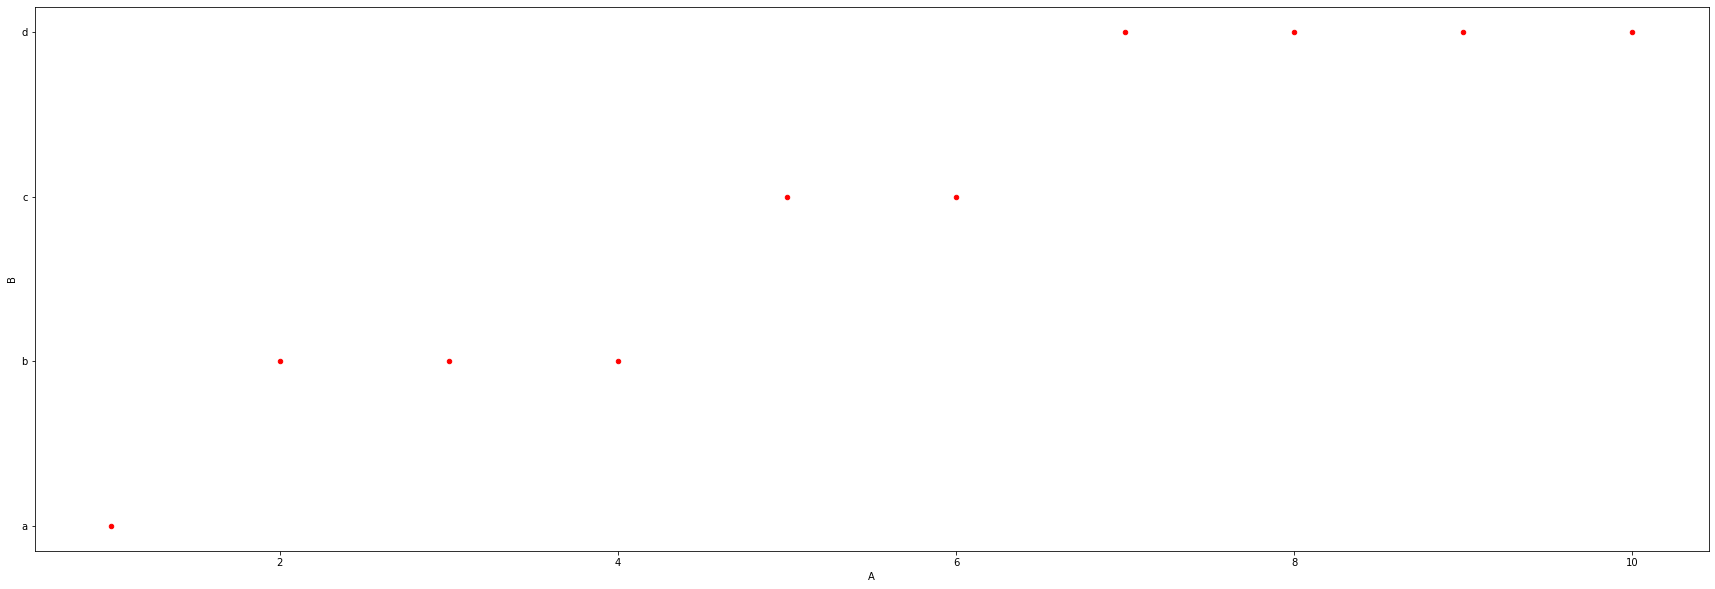

In [0]:
# Convert PySpark to Pandas Dataframe
pd_df = sp_df.toPandas()

# Create Scatter Plot with Pandas Dataframe
pd_df.plot.scatter(x='A', y='B', color='red', figsize=(30,10))

B,A
1,1
3,9
2,11
4,34


Out[74]: <AxesSubplot:xlabel='B', ylabel='A'>

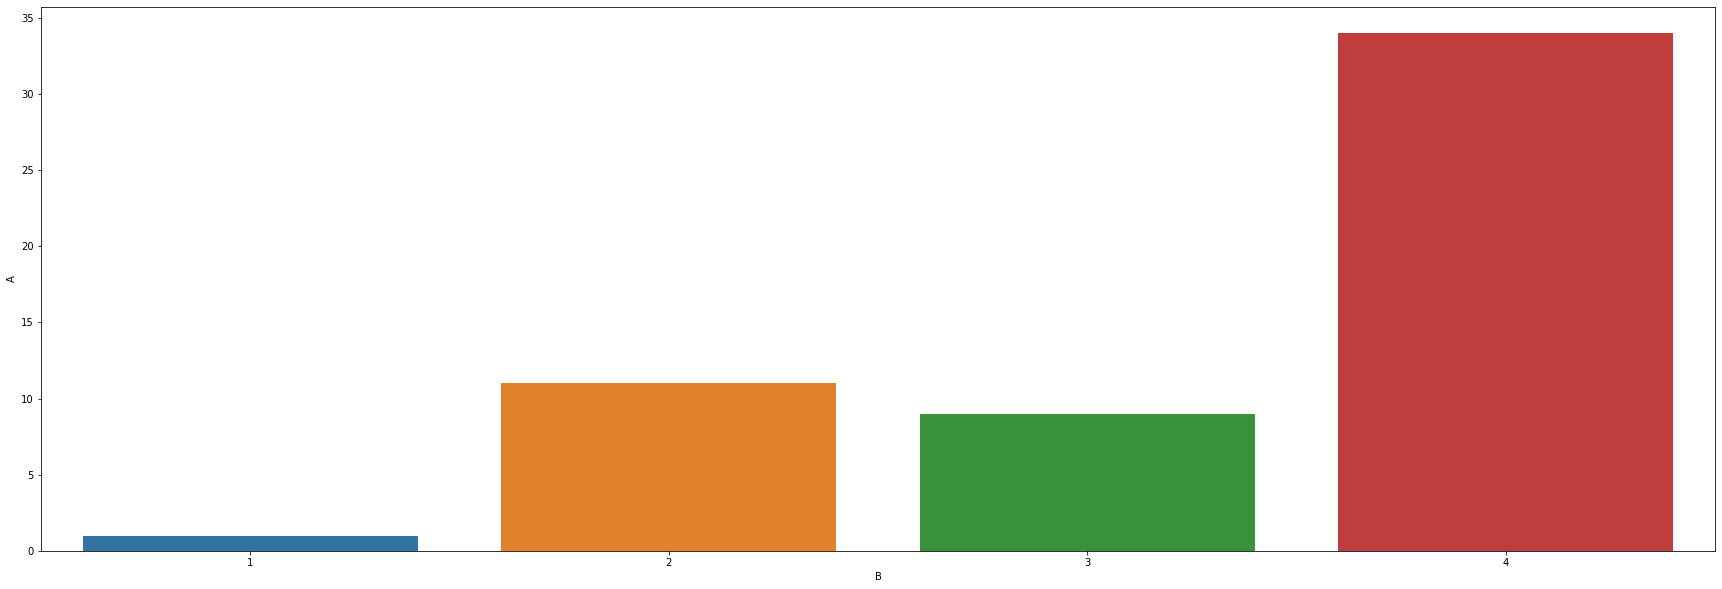

In [0]:
import matplotlib.pyplot as plt
import seaborn as sb

fig, ax = plt.subplots(figsize=(30,10))

#https://stackoverflow.com/questions/71209619/pandas-groupby-and-apply-aggregate-function-across-rows
pd_df_gb = pd_df.groupby(['B']).agg({'B':'count', 'A':'sum'})
pd_df_gb.display()

sb.barplot(x='B', 
           y='A',
           data = pd_df_gb )